### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### What are the criteria to identify an outlier?

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

### What is the reason for an outlier to exists in a dataset?

1. Variability in the data
2. An experimental measurement error

### What are the impacts of having outliers in a dataset?

1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range



In [2]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

## 1. Detecting outlier using Z score

### Using Z score

Formula for Z score = (Observation - Mean)/Standard Deviation

z = (X - μ) / σ

In [3]:
# Data that falls outside 3 standard deviations is considered an outlier

outliers=[]
def detect_outliers(data):
    # data - np.array
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [4]:
outlier_pt=detect_outliers(dataset)

In [5]:
outlier_pt

[102, 107, 108]

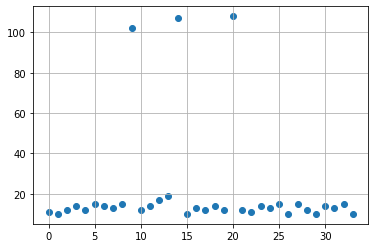

In [10]:
plt.scatter(np.arange(len(dataset)),dataset)
plt.grid(True)
plt.show()

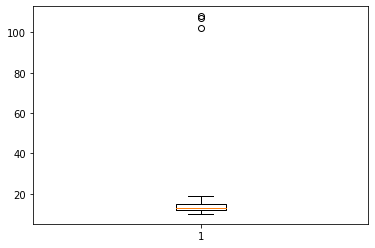

In [20]:
plt.boxplot(dataset);

## InterQuantile Range

75%- 25% values in a dataset

### Steps
#### 1. Arrange the data in increasing order
#### 2. Calculate first(q1) and third quartile(q3)
#### 3. Find interquartile range (q3-q1)
#### 4.Find lower bound q1*1.5
#### 5.Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [21]:
outliers=[]
def IQR_outlier(data):
    sorted_data=sorted(data) # Sorting the data

    quratile3 = np.percentile(sorted_data,75)
    quratile1 = np.percentile(sorted_data,25)
    
    iqr_value = quratile3 - quratile1
    
    lower_bound_val = quratile1 - (1.5 * iqr_value)
    upper_bound_val = quratile3 + (1.5 * iqr_value)
    
    for item in data:
        if(item < lower_bound_val or item > upper_bound_val):
            outliers.append(item)
    return outliers

final = IQR_outlier(dataset)
final


[102, 107, 108]